In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# Lexicographical order
Define a function that gives the index of a cell $i,j,k$ for the lexicographical order.
Assume that you have $N^3$ grid points.
The lexicographical order is defined as
$$\lambda(i,j,k) = (i-1) N^2 + (j - 1) N + k.$$

In [3]:
# %load solution_lexicographical_order.py、
def is_in_grid(i,j,k,N):
    return 0 < i <= N and 0 < j <= N and 0 < k <= N

def lexicographical_order(i,j,k, N):
    # TODO
    return (i - 1) * N**2 + (j - 1) * N + k

# Nine-point stencil
Define a function set_stencil that sets the row for the point at $(i,j,k)$ in the matrix $A$.
It should take a function ordering (e.g. lexicographical_order that you've defined earlier).
Note: Python uses zero-based indexing, the math notation uses one-based indexing.


For this exercise, as we are only interested in the sparsity patterns, the actual values do not matter, it's fine to set all values to 1. 


In [4]:
# %load solution_set_stencil.py
def set_stencil(A, ordering, i, j, k, N):
    # TODO
    h = 1/(N+1)
    a = ordering(i,j,k, N)
    A[a-1,a-1] += (-1 * 6) / h**2
    for sign in (-1, 1):
        own_coord = [i,j,k]
        for idx in range(3):
            other_coord = own_coord.copy()
            other_coord[idx] += sign
            
            # Ignore bnd points
            if is_in_grid(*other_coord,N):
                b = ordering(*other_coord,N)
                A[a-1,b-1] += 1.0/h**2

(<Figure size 432x288 with 1 Axes>,
 <AxesSubplot:title={'center':'Number of non zeros = 725'}>)

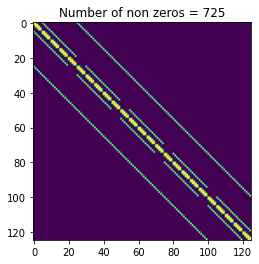

In [5]:
def plot_sparsity_pattern(A):
    fig, ax = plt.subplots(1,1)
    non_zeros = np.abs(A) > 0
    ax.imshow(non_zeros)
    ax.set_title("Number of non zeros = {}".format(non_zeros.sum()))
    return fig, ax
    
def generate_matrix(ordering, N):
    assert(N % 2 == 1)
    A = np.zeros(((N)**3, (N)**3))

    for i in range(1,N+1):
        for j in range(1,N+1):
            for k in range(1,N+1):
                set_stencil(A, ordering, i, j, k, N)
    return A
    
N = 5
A = generate_matrix(lexicographical_order, N)
plot_sparsity_pattern(A)

# Reordering
The sparsity pattern (shown above) does not lead to a numerical method that can be implemented in parallel.
In the worksheet, we introduce the red-black reordering, which is gives a point the color black if the lexicographical mapping leads to an even index and red otherwise.

We can see this below:
The plot shows 2D slices of the points for $N=3$. We can see that all direct neighbors are colored in a different color.

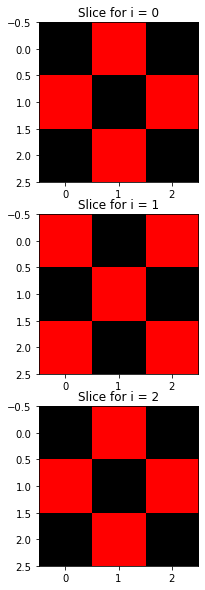

In [6]:
from matplotlib import colors
def visualize_red_black_order(N):
    red_blacks = []
    for i in range(1,N+1):
        red_black = np.zeros((N,N))
        for j in range(1,N+1):
            for k in range(1,N+1):
                red_black[j-1,k-1] = lexicographical_order(i,j,k, N) % 2 == 0
        red_blacks.append(red_black)

    cmap = colors.ListedColormap(['black', 'red'])
    bounds=[0, 0.5, 1]
    norm = colors.BoundaryNorm(bounds, cmap.N)

    fig, axs = plt.subplots(len(red_blacks), 1, figsize=(10,10))
    for i, ax in enumerate(axs):
        ax.imshow(red_blacks[i], cmap=cmap, norm=norm)
        ax.set_title(f"Slice for i = {i}")
    return fig, ax

fig, ax = visualize_red_black_order(N=3)

# Red-black order
Implement a function red_black_order that orders the grid points first by color and then by their lexicographical index.

In [7]:
# %load solution_red_black_order.py
def red_black_order(i,j,k, N):
    # TODO
    assert(is_in_grid(i,j,k,N))
    lex_idx = lexicographical_order(i,j,k, N)
    if lex_idx % 2 == 0:
        return lex_idx // 2
    else:
        return (N**3 + lex_idx) // 2

(<Figure size 432x288 with 1 Axes>,
 <AxesSubplot:title={'center':'Number of non zeros = 725'}>)

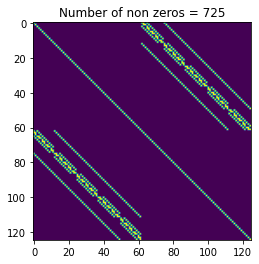

In [8]:
A = generate_matrix(red_black_order, N)

plot_sparsity_pattern(A)

We can now see, that the matrix has a block sparsity pattern as discussed in the worksheet.